In [2]:
# !pip install texify

In [1]:
import cv2
from pdftolatex.block_detector import segment_paper

img = cv2.imread('test.png')
bboxes = segment_paper(img, two_col=True, preview=True)

(1835, 1418, 3)
87 252 304 26


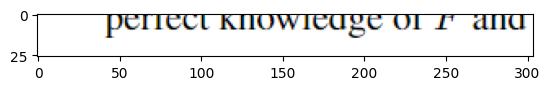

In [4]:
import numpy as np
print(img.shape) 
page_img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
box = bboxes[3]
print(box.x, box.y, box.width, box.height)

import matplotlib.pyplot as plt
img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [5]:
from rapidocr_onnxruntime import RapidOCR

engine = RapidOCR()

# img_path = 'tests/test_files/ch_en_num.jpg'
result, elapse = engine(img_part)
print(result)
print(elapse)

C:\Users\yafex\AppData\Roaming\Python\Python312\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


[[[[0, 0], [304, 0], [304, 26], [0, 26]], 'perfect knowledge of F and', '0.8401224613189697']]
[0.0, 0.004910469055175781, 0.10351324081420898]


In [6]:
result[0][1]

'perfect knowledge of F and'

In [7]:
h, w = page_img.shape[:2]
print(h, w)

w_threshold = w/20 # 宽度小于这个值的block直接用传统ocr识别

1835 1418


In [ ]:
# import pytesseract

# content = pytesseract.image_to_data(img_part, output_type=pytesseract.Output.DICT)
# " ".join(content['text'])
import os

os.environ["HTTPS_PROXY"] = "http://localhost:7890"
os.environ["HTTP_PROXY"] = "http://localhost:7890"

from texify.inference import batch_inference
from texify.model.model import load_model
from texify.model.processor import load_processor
from PIL import Image

model = load_model()
processor = load_processor()

In [ ]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])



\begin{tabular}{|c|c|c|} \hline  & $\hat{E}_{\rm f}[\kappa L_{\rm cl}]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[r_{\rm d}A_{\rm cl}]$ \\  & $\hat{E}_{\rm f}[\exp(r_{\rm r}-1-\varepsilon,1+\varepsilon)A_{\rm f}]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{\rm f})]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{\rm f})]$ \\  & $\hat{L}^{\rm CP}=\hat{E}_{\rm f}[\min(r_{\rm d}A_{\rm cl},\,\exp(r_{\rm r},\,1-\varepsilon,1+\varepsilon)A_{


In [ ]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])

$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$


39 236 619 69


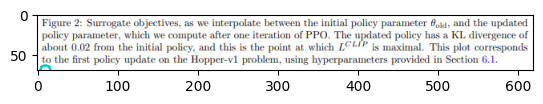

In [ ]:
box = bboxes[1]
print(box.x, box.y, box.width, box.height)
img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [ ]:
img = Image.fromarray(img_part)
# img = Image.open("test.png") # Your image name here
results = batch_inference([img], model, processor)
print(results[0])


Figure 2: Surrogate objectives, as we interpolate between the initial policy parameter $\theta_{\text{old}}$, and the updated policy parameter, which we compute after one iteration of PPO. The updated policy has a KL divergence of about 0.02 from the initial policy, and this is the point at which $L^{CLIP}$ is maximal. This plot corresponds to the first policy update on the Hopper-v1 problem, using hyperparameters provided in Section 6.1.



$${\cal L}^{C P I}(\theta)=\hat{\mathbb{E}}_{t}\bigg[\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}\hat{A}_{t}\bigg]=\hat{\mathbb{E}}_{t}\Big[r_{t}(\theta)\hat{A}_{t}\Big].$$

In [ ]:
print(results[0])

$$\left[L^{C P I}(\theta)={\hat{\mathbb{E}}}_{t}\left[{\frac{\pi_{\theta}(a_{t}\mid s_{t})}{\pi_{\theta_{\mathrm{old}}}(a_{t}\mid s_{t})}}{\hat{A}}_{t}\right]={\hat{\mathbb{E}}}_{t}\left[r_{t}(\theta){\hat{A}}_{t}\right].\right]$$


#### png -> jpg

In [ ]:
from PIL import Image

# 打开PNG图像
png_image = Image.open("doc/pic.png")

# 将图像转换为RGB模式（如果它不是的话）
rgb_image = png_image.convert('RGB')

# 保存为JPG格式
rgb_image.save("doc/detecting_steps.jpg", "JPEG")

print("转换完成！")

转换完成！
